In [50]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import sys
import csv
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import dill as pickle
import os
import json

In [5]:
with open('C:\\Users\\ctg3039\\Downloads\\IGC.DOI.tsv', 'w') as handle:
    writer = csv.writer(handle, delimiter='\t')
    writer.writerow(["Sequence-Id", "Description","Sequence"])
    for seq_record in SeqIO.parse(open("C:\\Users\\ctg3039\\Downloads\\IGC.DOI.pep", mode='r'), 'fasta'):
        # remove .id from .description record (remove all before first space)
        seq_record.description=' '.join(seq_record.description.split()[1:])
        writer.writerow([seq_record.id, seq_record.description, seq_record.seq])

In [7]:
raw_data = pd.read_csv('C:\\Users\\ctg3039\\Downloads\\IGC.DOI.tsv', sep="\t", header='infer')
raw_data.columns = raw_data.columns.str.strip().str.lower().str.replace(' ', '_')

In [9]:
length = [len(x) for x in raw_data.sequence]

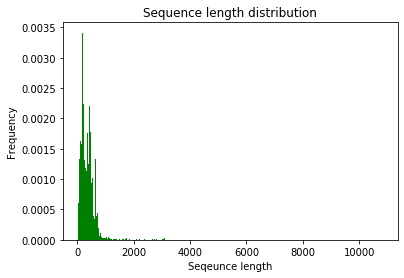

In [26]:
plt.hist(length, bins='auto',density=True, facecolor='g')
plt.xlabel('Seqeunce length')
plt.ylabel('Frequency')
plt.title('Sequence length distribution')
plt.show()

In [27]:
int(np.percentile(length, 99))

1189

In [2]:
#Printing the input parameters
infile = open("C:\\Users\\ctg3039\\Downloads\\569366338.flags",'rb')
obj = pickle.load(infile)
for attribute, value in obj.items():
    print('{} : {}'.format(attribute, value))

pad_length : 1439
epochs : 100
filter_length : [50, 50]
patience : 20
filters : [400, 400]
cohst_neg_file : 
n_fc_layers : 2
no_pad : False
data_dir : example/CoMET-outputs/
dataset_size : 11036
validation_split : 0.2
motifs : True
infile : example/sprot_dna_tf_pfam.tsv
motifs_filetype : png
optimizer : nadam
learning_rate : 0.002
batch_size : 50
key : fam
reduce_factor : 0.5
filter_stride : [1, 1]
dataset_fraction : 1.0
extras : 
mode : CoDER
n_conv_layers : 2
model : 


In [5]:
#Printing the architecture
infile = open("C:\\Users\\ctg3039\\Downloads\\569366338.arch",'rb')
obj = json.load(infile)
print("backend : {}".format(obj["backend"]))
#for attribute, value in obj.items():
#    print('{} : {}'.format(attribute, value))

backend : tensorflow


In [51]:
b = np.load('C:\\Users\\ctg3039\\Downloads\\569366338.history.npz')

In [52]:
for attribute, value in b.items():
    print('{} : {}'.format(attribute, value))

loss : [0.0135473  0.01324395 0.01324395 0.01324395 0.01324395 0.01324395
 0.01324395 0.01324395 0.01324395 0.01324395 0.01324395 0.01324395
 0.01324395 0.01324395 0.01324395 0.01324395 0.01324395 0.01324395
 0.01324395 0.01324395 0.01324395]
training_duration : 1204.3395929336548
mean_cat_acc : [0.02381493 0.02366003 0.02363891 0.02368321 0.02365185 0.02364821
 0.0236508  0.02364929 0.0236602  0.0236389  0.02363397 0.02366745
 0.02363771 0.02364026 0.02366404 0.0236478  0.0236655  0.0236506
 0.02365431 0.02365087 0.02364685]
lr : [0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
val_mean_cat_acc : [0.02393351 0.02393351 0.02393351 0.02393351 0.02393351 0.02393351
 0.02393351 0.02393351 0.02393351 0.02393351 0.02393351 0.02393351
 0.02393351 0.02393351 0.02393351 0.02393351 0.02393351 0.02393351
 0.02393351 0.02393351 0.02393351]
val_loss : [0.01339028 0.01339028 0.01339028 0.01339028 0.01339028 0.01339028
 

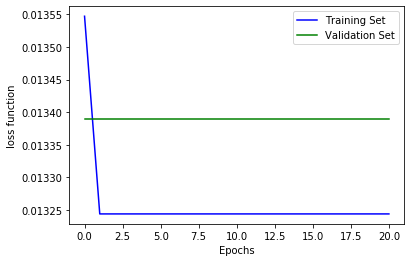

In [59]:
#plt.plot(np.insert(b["loss"],0,np.max(b["loss"])))
f = plt.figure()
plt.plot(b["loss"], color = 'blue',label='Training Set')
plt.plot(b["val_loss"], color='green', label='Validation Set')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss function')
#plt.title('Sequence length distribution')
plt.show()
f.savefig("loss.pdf", bbox_inches='tight')

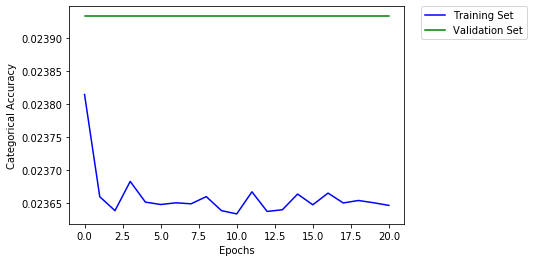

In [57]:
#plt.plot(np.insert(b["mean_cat_acc"],0,np.min(b["mean_cat_acc"])))
f = plt.figure()
plt.plot(b["mean_cat_acc"], color = 'blue',label='Training Set')
plt.plot(b["val_mean_cat_acc"], color='green', label='Validation Set')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
#plt.title('Sequence length distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
f.savefig("CatAccuracy.pdf", bbox_inches='tight')

In [9]:
length = 1439
raw_data = pd.read_csv("C:\\Users\\ctg3039\\Downloads\\CoMET-master\\CoMET-master\\example\\sprot_dna_tf_pfam.tsv", sep="\t", header='infer')
clipData = [x[0:length] for x in raw_data.Sequence]

In [10]:
max(([len(x) for x in clipData]))

1439

In [53]:
time=pd.read_csv('C:\\Users\\ctg3039\\Downloads\\IGC-DOI-ELMo-training.txt', sep="\t",header=None)
perplexity=[]
for i in range(0,len(time[0])):
    if(i % 2 == 0):
        perplexity.append(float(time[0][i].split("train_perplexity=")[1]))

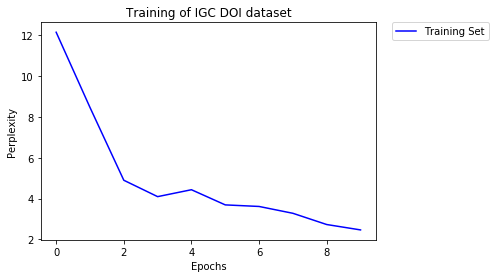

In [54]:
#f = plt.figure()
plt.plot(perplexity, color = 'blue',label='Training Set')
#plt.plot(b["val_mean_cat_acc"], color='green', label='Test Set')
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
plt.title('Training of IGC DOI dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
f.savefig("C:\\Users\\ctg3039\\Downloads\\IGC-DOI-ELMo-training-plot.pdf", bbox_inches='tight')  

In [48]:
time=pd.read_csv('C:\\Users\\ctg3039\\Downloads\\IGC-DOI.trainingLogs.txt', sep="\t",header=None)
perplexity=[]
batchSize=[]
for i in range(0,len(time[0])):
    if(i % 2 == 0):
        perplexity.append(float(time[0][i].split("train_perplexity=")[1]))
        batchSize.append(float(time[0][i].split("Batch ")[1].split(",")[0]))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot(np.asarray(perplexity))
#plt.plot(b["val_mean_cat_acc"], color='green', label='Test Set')
plt.xlabel('Batch')
plt.ylabel('Perplexity')
plt.title('Training of IGC DOI dataset')
plt.show()
f.savefig("C:\\Users\\ctg3039\\Downloads\\IGC-DOI-ELMo-trainingLogs.pdf", bbox_inches='tight') 

NameError: name 'np' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
pd.DataFrame(list(zip(batchSize,perplexity)),columns =['Batch Size','Perplexity'])

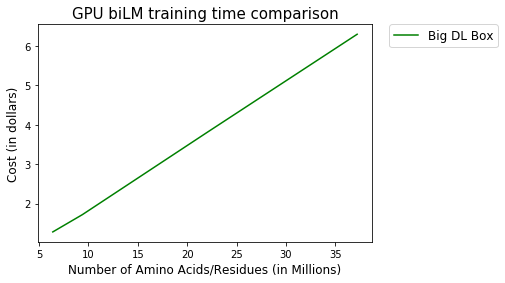

In [3]:
from scipy.interpolate import make_interp_spline, BSpline
#small_time=[5,11.09,18.8]
#small_time=[17482,39936,67726]
big_time=[1.28,1.72,3.8,6.3]
residues=[6.4,9.4,21.97,37.2]
#T=max()
#xnew = np.linspace(min(residues),max(residues),300) #300 represents number of points to make between T.min and T.max
#power=small_time
#spl = make_interp_spline(residues, power, k=3) #BSpline object
#power_smooth = spl(xnew)
#f = plt.figure()
#plt.plot(residues,[i * 3 for i in small_time], color = 'blue',label='Small DL Box')
#plt.plot(residues,[i * 7 for i in big_time], color = 'green',label='Big DL Box')
#plt.plot(residues,small_time, color = 'blue',label='Small DL Box')
plt.plot(residues,big_time, color = 'green',label='Big DL Box')

plt.xlabel('Number of Amino Acids/Residues (in Millions)',fontsize=12)
#plt.ylabel('Time (in hours)',fontsize=12)
plt.ylabel('Cost (in dollars)',fontsize=12)
plt.title('GPU biLM training time comparison',fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=12)
plt.show()
#f.savefig("C:\\Users\\ctg3039\\Downloads\\GPU-processingCost-Plot.pdf", bbox_inches='tight')  

In [101]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(residues,big_time)

In [102]:
(intercept+slope*1677)

833.3182933782642

In [104]:
833.32/24

34.72166666666667